In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
%matplotlib inline




Using TensorFlow backend.


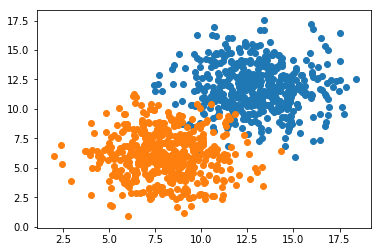

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts), np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts), np.random.normal(6, 2, n_pts)]).T
X = np.vstack((Xa, Xb))
Y = np.array([np.zeros(n_pts), np.ones(n_pts)])
Y = Y.reshape(n_pts * 2, 1)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
plt.show()

In [4]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=Y, verbose=1, batch_size=50, epochs=500, shuffle='true')


Epoch 1/500
1000/1000 [==============================] - 0s 343us/step - loss: 3.1263 - acc: 0.5330
Epoch 2/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.9463 - acc: 0.5930
Epoch 3/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.6810 - acc: 0.6660
Epoch 4/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.5434 - acc: 0.7310
Epoch 5/500
1000/1000 [==============================] - 0s 33us/step - loss: 0.4559 - acc: 0.7980
Epoch 6/500
1000/1000 [==============================] - 0s 34us/step - loss: 0.3826 - acc: 0.8720
Epoch 7/500
1000/1000 [==============================] - 0s 37us/step - loss: 0.3377 - acc: 0.9150
Epoch 8/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.3009 - acc: 0.9310
Epoch 9/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.2728 - acc: 0.9450
Epoch 10/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.2489 - acc: 0.9540
Epoch 11

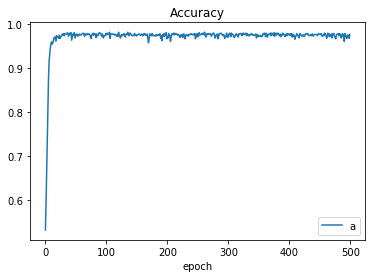

In [5]:
plt.plot(h.history['acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend('accuracy')


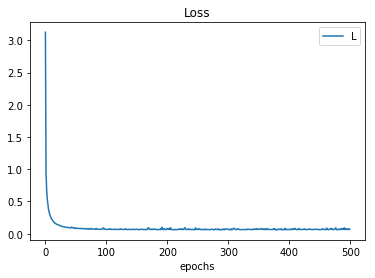

In [6]:
plt.plot(h.history['loss'])
plt.title("Loss")
plt.xlabel('epochs')
plt.legend('Loss')

In [7]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
#     print(x_span)
#     print(y_span)
#     print(xx)
#     print(yy)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    #print(grid)
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
    

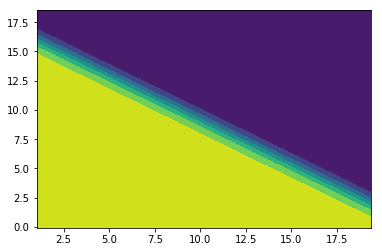

In [12]:
plot_decision_boundary(X, Y, model)


prediction is:  [[0.99998856]]


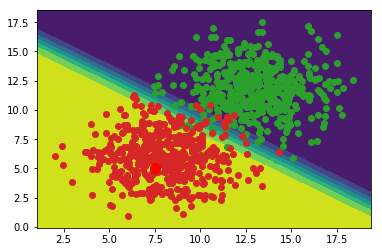

In [13]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
 
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
 
 
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)